# 03. Polynominal Regression

### 공부 시간에 따른 점수 (우등생)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values #마지막에 value 안 적으면 표 heading까지 가져오니까 적어야해
y = dataset.iloc[:,-1].values
X, y

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2],
        [2.4],
        [2.5],
        [2.6],
        [2.9],
        [3.1],
        [3.2],
        [3.3],
        [3.7],
        [3.9],
        [4. ],
        [4.1],
        [4.2],
        [4.4],
        [4.7],
        [4.8]]),
 array([  2,   4,   6,   4,   6,  14,  10,  12,  24,  26,  32,  46,  44,
         52,  58,  54,  68,  80,  84, 100]))

## 3-1. 단순 선형 회기 (Simple Linear Regression)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

### 데이터 시각화 (전체)

<function matplotlib.pyplot.show(close=None, block=None)>

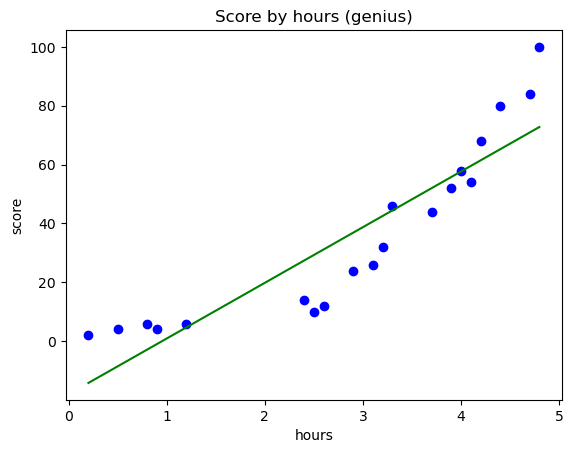

In [9]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show

In [10]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [47]:
from sklearn.preprocessing import PolynomialFeatures  #scikitLearn에서 polynomial regression을 바로 다루는 건 없어서 변형을 통해 진행해야 함. 
poly_reg = PolynomialFeatures(degree=3) #2차 다항식
X_poly = poly_reg.fit_transform(X) #fit적고 transform적고 따로따로 할 수 있지만 scikitLearn에서 기능으로 한 번에 넣어줌
X_poly[:5]  #데이터가 확장된 걸 볼 수 있음. 위에서 설정한 degree에 맞게 x의 0승, 1승, 2승까지를 feature로 만들어주는 것.
#x의 0승이라서 원래 데이터가 무엇이든 1로 바뀌고, x의 1승이니 x그대로 나오고, 세 번째는 x의 2승이니 x의 제곱한 값이 나옴. 이걸 다 변환한다는 것. 
#[x] -> [x^0, x^1, x^2] -> x가 3이라면 [1, 3, 9]으로 변환

array([[1.   , 0.2  , 0.04 , 0.008],
       [1.   , 0.5  , 0.25 , 0.125],
       [1.   , 0.8  , 0.64 , 0.512],
       [1.   , 0.9  , 0.81 , 0.729],
       [1.   , 1.2  , 1.44 , 1.728]])

In [49]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [51]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) #변환된 x와 y를 가지고 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 x와 y)

<function matplotlib.pyplot.show(close=None, block=None)>

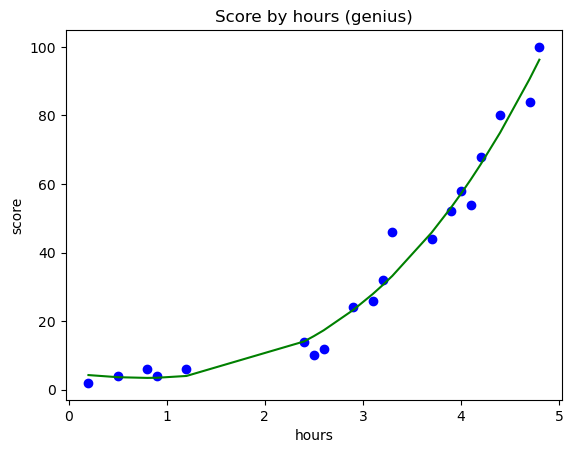

In [75]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, lin_reg.predict(poly_reg.transform(X)), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show

In [58]:
#그래프를 조금 더 부드럽게 표현하기 위해 사용하는 방식인데. numpy에서 데이터를 0.1 단위로 잘라서 더 많이 만들어주고 그걸 바탕으로 다시 그래프를 그려주는 거야 시각화를 위해.
X_flat = np.ravel(X) # X가 2차원 형식이라 이걸 1차원으로 바꿔주는 것. 원래는 없었는데 NumPy 1.25버전 이후부터는 필요해서 내가 넣음.
X_range = np.arange(min(X_flat), max(X_flat), 0.1) #x의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터를 생설
X_range #이 값을 바로 쓰면 안됨. 원래 x의 값이 2차원 방식으로 표현되어 있거든. 

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [60]:
X_range.shape

(46,)

In [62]:
X[0:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [64]:
X_range = X_range.reshape(len(X_range), 1) #row 개수는 자동으로 계산하려면 -1, column 개수는 1개
X_range.shape

(46, 1)

In [66]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

<function matplotlib.pyplot.show(close=None, block=None)>

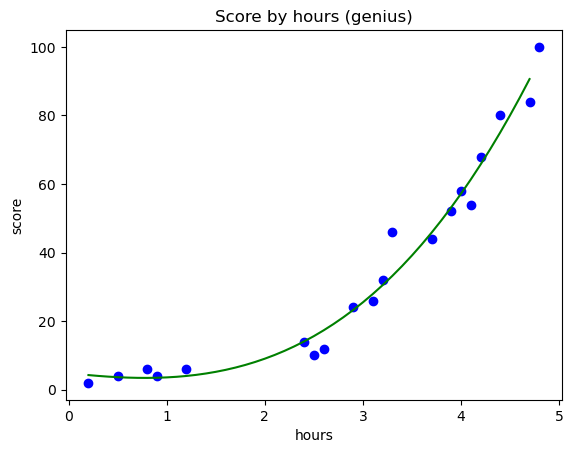

In [68]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show

### 공부 시간에 따른 시험 성적 예측

In [77]:
reg.predict([[2]])

array([19.85348988])

In [79]:
lin_reg.predict(poly_reg.transform([[2]])) # 2시간을 공부했을 때 다항 회기 모델의 예측 
#들어가는게 다항으로 들어가야 하니까 그냥 x를 쓸 수 있는게 아니라, poly_reg에서 숫자를 변환시켜준 transform으로 적어야 해.

array([9.07729176])

In [81]:
lin_reg.score(poly_reg.transform(X), y)

0.9776239138443199